<a href="https://colab.research.google.com/github/fulup2022/formationpublic/blob/main/Training_models_on_smot_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.First we get the data

In [ ]:
# First we map the drive to access the data file
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# We load the data file
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/DSTI/Churn/Bank churn/Bank_churn_dataset.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 2.Data exploration and features analysis

In [ ]:
# We check the shape of the dataset and the columns names
print(f"Shape = {dataset.shape}")
print(f"The names of the columns = {dataset.columns}")
print(f"The range of the index = {dataset.index}")

Shape = (10000, 14)
The names of the columns = Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
The range of the index = RangeIndex(start=0, stop=10000, step=1)


In [ ]:
# Another way to get a summary of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# We check if there is some Nan in the dataset
dataset.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# we check the data ventilation
dataset.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


We notice that there are only 2932 distinct surnames among the 10 000 data samples. We can deduce that it is not a real dataset since it seems doubtful that there are so few names shared by all the clients.

We have two genders with a good repartition between males and females.

For the exited values, we can notice that there are around 20% of clients who have churned. It means that we have unbalanced data and it will be necessary to handle this aspect.

In [ ]:
dataset.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

There is maybe something to do about this point

In [ ]:
# We take our features in a  new dataset. 
# We exclude the three first columns of the original dataset since they are too specific and the last one since it is the label
df = dataset.iloc[:, 3:]
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Analysis of features types
numerical_features = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']
categorical_features = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
label = ['Exited']

In [ ]:
# For the different categorical features, we check the possible values
for c in categorical_features:
  print(df.groupby(c)[c].size())
  print (' ')

HasCrCard
0    2945
1    7055
Name: HasCrCard, dtype: int64
 
IsActiveMember
0    4849
1    5151
Name: IsActiveMember, dtype: int64
 
Geography
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
 
Gender
Female    4543
Male      5457
Name: Gender, dtype: int64
 


In [ ]:
# we copy the data to make some analysis without modifying the original dataset
df_analysis = df.copy()
df_analysis.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# For the categorical features that are in string format, we replace the values by a corresponding integer in order to be able to calulate a correlation with other features for these values
df_analysis.Geography = df_analysis.Geography.map({'France' : 0, 'Germany' : 1, 'Spain' : 2})
df_analysis.Gender = df_analysis.Gender.map({'Female' : 0, 'Male' : 1})

In [ ]:
df_analysis.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


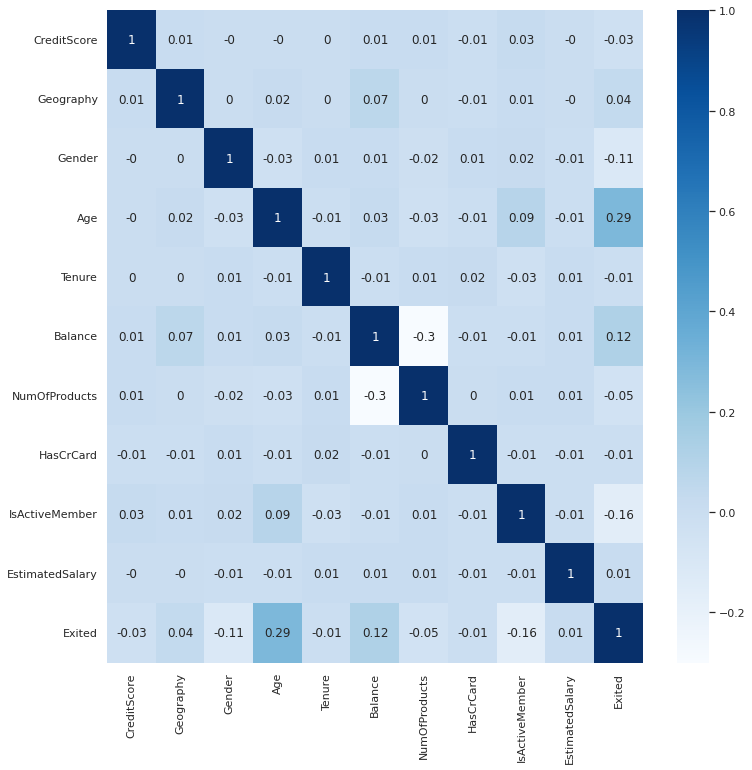

In [ ]:
# calculate the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

f = plt.figure(figsize = (12,12))
sns.set()
sns.heatmap(df_analysis.corr().round(2), annot = True, cmap = "Blues")

**So we notice that there is no correlation between the different features, and there is sense to keep them all.**

# 3.Split of the data in train/test and preparing the automatic data transformation

In [ ]:
# we make the data split between train and test
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)

In [ ]:
print(f"The shape of train : {df_train.shape}")
print(f"The shape of test : {df_test.shape}")

The shape of train : (8000, 11)
The shape of test : (2000, 11)


In [ ]:
df_train_x = df_train.iloc[:,:-1]
df_train_y = df_train.iloc[:,-1]
df_test_x = df_test.iloc[:,:-1]
df_test_y = df_test.iloc[:,-1]

In [ ]:
df_train_x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2694,628,Germany,Male,29,3,113146.98,2,0,1,124749.08
5140,626,France,Female,29,4,105767.28,2,0,0,41104.82
2568,612,Germany,Female,47,6,130024.87,1,1,1,45750.21
3671,646,Germany,Female,52,6,111739.40,2,0,1,68367.18
7427,714,Spain,Male,33,8,122017.19,1,0,0,162515.17


In [ ]:
# we prepare the transformation operations on numerical features and string features in pipelines in order to be able to apply the same transformations for the future model in prediction
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer

numerical_pipeline = make_pipeline(SimpleImputer(), StandardScaler())

categorical_pipeline = make_pipeline(SimpleImputer(strategy = 'most_frequent'), OrdinalEncoder())

In [ ]:
# we include the transformation operations into a single column transformer. Each transformation applies to the corresponding features
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

preprocessor = make_column_transformer((numerical_pipeline, numerical_features), (categorical_pipeline, categorical_features))

In [ ]:
# test of the automatic transformations
preprocessor.fit_transform(df_train_x)


array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.        ,
         1.        ,  1.        ],
       [-0.25150912, -0.94449979, -0.35520275, ...,  0.        ,
         0.        ,  0.        ],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.13123255,  0.01077067,  1.03095433, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  0.        ,
         1.        ,  1.        ]])

# 4.We use the SMOT

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
df_train_x_res, df_train_y_res = oversample.fit_resample(preprocessor.fit_transform(df_train_x), df_train_y)

In [ ]:
print(f"The shape of resampled train x : {df_train_x_res.shape}")
print(f"The shape of resampled train y : {df_train_y_res.shape}")

The shape of resampled train x : (12756, 10)
The shape of resampled train y : (12756,)


In [ ]:
df_train_y_res.value_counts()

0    6378
1    6378
Name: Exited, dtype: int64

# 5.Trying several models

In [ ]:
cd '/content/drive/MyDrive/Colab Notebooks/projet/'

/content/drive/MyDrive/Colab Notebooks/projet


In [ ]:
# we have to install scikeras to be able to import the specific modules that have been developped
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# we import one specific class ModelWrapper and one specific function model_nn that will be used for the models processing
from specific_modules import ModelWrapper, model_nn

In [ ]:
list_of_models = []

## 5.1.Model 1 : XGBClassifier

In [ ]:
# we try the XGB model with a GridSearchCV to optimize the hyper parameters
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_xgb_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1,0.2], 'n_estimators':[5,10]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid = param_xgb_grid, cv=5, refit=True, verbose=0)

In [ ]:
# we train the model directly on the resampled training data
xgb_grid.fit(df_train_x_res, df_train_y_res)

In [ ]:
# we integrate the trained model in the model wrapper
model1 = ModelWrapper(base_preprocessor=preprocessor, base_model = xgb_grid, tag = 'XGBClassifier trained on smot data')

In [ ]:
modele1_training_analysis = pd.DataFrame(model1.named_steps['model'].cv_results_)
modele1_training_analysis.sort_values(by=['mean_test_score'], ascending=False).head()

In [ ]:
model1_predictions = model1.predict(df_test_x)

In [ ]:
model1.evaluate(y_true = df_test_y, y_pred = model1_predictions)

Confusion matrix : array([[1418,  167],
       [ 138,  277]])
Precision : 0.6238738738738738
Accuracy : 0.8475
Recall : 0.6674698795180722


In [ ]:
model1.calculate_roc(y_true = df_test_y, y_score = model1.predict_proba(df_test_x)[:,1])

Roc_auc_score : 0.8636676675154877


In [ ]:
list_of_models.append(model1)

## 5.2.Model 2 : Logistic regression

In [ ]:
# Fit logistic regression
from sklearn.linear_model import LogisticRegression

param_logistic_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
logistic_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid = param_logistic_grid, cv = 10, refit=True, verbose=0)

In [ ]:
# we train the model directly on the resampled training data
logistic_Grid.fit(df_train_x_res, df_train_y_res)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 10, 50, 100],
                         'fit_intercept': [True], 'intercept_scaling': [1],
                         'max_iter': [250], 'penalty': ['l2'],
                         'tol': [1e-05, 0.0001, 1e-06]})

In [ ]:
# we integrate the trained model in the model wrapper
model2 = ModelWrapper(base_preprocessor=preprocessor, base_model = logistic_Grid, tag = 'LogisticRegression trained on smot data')

In [ ]:
model2_predictions = model2.predict(df_test_x)

In [ ]:
model2.evaluate(y_true = df_test_y, y_pred = model2_predictions)

Confusion matrix : array([[1132,  453],
       [ 133,  282]])
Precision : 0.3836734693877551
Accuracy : 0.707
Recall : 0.6795180722891566


In [ ]:
model2.calculate_roc(y_true = df_test_y, y_score = model2.predict_proba(df_test_x)[:,1])

Roc_auc_score : 0.7649591425639466


In [ ]:
list_of_models.append(model2)

## 5.3.Model 3 : SVM with Pol Kernel

In [ ]:
# Fit SVM
from sklearn.svm import SVC

param_svm_grid = {'C': [0.5,1,10,50,100], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['poly'],'degree':[2,3] }
svm_Grid = GridSearchCV(SVC(),param_grid = param_svm_grid, cv = 3, refit=True, verbose=0)

In [ ]:
# we train the model directly on the resampled training data
svm_Grid.fit(df_train_x_res, df_train_y_res)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.5, 1, 10, 50, 100], 'degree': [2, 3],
                         'gamma': [0.1, 0.01, 0.001], 'kernel': ['poly'],
                         'probability': [True]})

In [ ]:
model3 = ModelWrapper(base_preprocessor=preprocessor, base_model = svm_Grid, tag = 'SVM trained on smot data')

In [ ]:
model3_predictions = model3.predict(df_test_x)

In [ ]:
model3.evaluate(y_true = df_test_y, y_pred = model3_predictions)

Confusion matrix : array([[1250,  335],
       [ 106,  309]])
Precision : 0.4798136645962733
Accuracy : 0.7795
Recall : 0.744578313253012


In [ ]:
model3.calculate_roc(y_true = df_test_y, y_score = model3.predict_proba(df_test_x)[:,1])

Roc_auc_score : 0.8446748508228498


In [ ]:
list_of_models.append(model3)

## 5.4.Model 4 : Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_rf_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid = param_rf_grid, cv=5, refit=True, verbose=0)

In [ ]:
# we train the model directly on the resampled training data
rf_grid.fit(df_train_x_res, df_train_y_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 6, 7, 8],
                         'max_features': [2, 4, 6, 7, 8, 9],
                         'min_samples_split': [3, 5, 6, 7],
                         'n_estimators': [50, 100]})

In [ ]:
model4 = ModelWrapper(base_preprocessor=preprocessor, base_model=rf_grid, tag = 'RandomForest trained on smot data')

In [ ]:
model4_predictions = model4.predict(df_test_x)

In [ ]:
model4.evaluate(y_true = df_test_y, y_pred = model4_predictions)

Confusion matrix : array([[1410,  175],
       [ 142,  273]])
Precision : 0.609375
Accuracy : 0.8415
Recall : 0.6578313253012048


In [ ]:
model4.calculate_roc(y_true = df_test_y, y_score = model4.predict_proba(df_test_x)[:,1])

Roc_auc_score : 0.8703933715936301


In [ ]:
list_of_models.append(model4)

## 5.5.Model 5 : Neural network

In [ ]:
from scikeras.wrappers import KerasClassifier

nn_with_keras = KerasClassifier(model = model_nn, batch_size=100, verbose = 2).set_params(epochs = 200)

In [ ]:
nn_with_keras.fit(df_train_x_res, df_train_y_res)

In [ ]:
model5 = ModelWrapper(base_preprocessor=preprocessor, base_model=nn_with_keras, tag = 'NeuralNetwork trained on smot data')

In [ ]:
model5_predictions = model5.predict(df_test_x)

20/20 - 0s - 108ms/epoch - 5ms/step


In [ ]:
model5.evaluate(y_true = df_test_y, y_pred = model5_predictions)

Confusion matrix : array([[1311,  274],
       [ 118,  297]])
Precision : 0.5201401050788091
Accuracy : 0.804
Recall : 0.7156626506024096


In [ ]:
model5.calculate_roc(y_true = df_test_y, y_score = model5.predict_proba(df_test_x)[:,1])

20/20 - 0s - 37ms/epoch - 2ms/step
Roc_auc_score : 0.8445881950514993


In [ ]:
list_of_models.append(model5)

# 6.Summary of all models

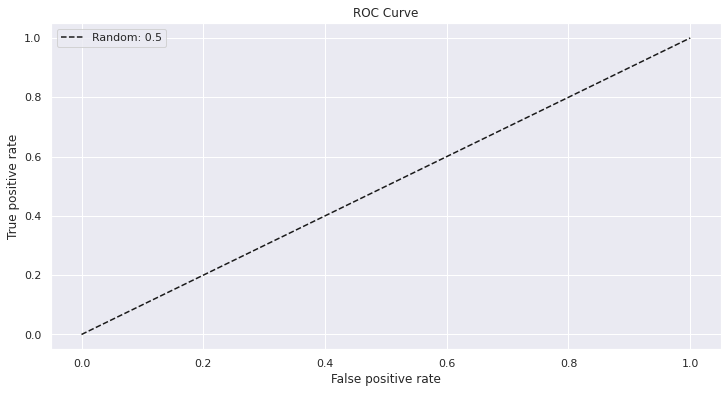

In [ ]:
global_report = pd.DataFrame(columns = ['Tag', 'Description' , 'Confusion matrix', 'Accuracy', 'Precision', 'Recall', 'ROC'])

plt.figure(figsize = (12,6), linewidth= 1)
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')

for model in list_of_models:
  global_report = global_report.append(model.get_performances(),ignore_index = True)
  plt.plot(model.fpr, model.tpr, label=str(model.tag) + ", AUC=" + str(model.roc_auc_score))

plt.legend(loc='best')

In [ ]:
global_report

,Tag,Description,Confusion matrix,Accuracy,Precision,Recall,ROC


# 7.Saving the models

In [ ]:
import os
import pickle

path_for_models_trained_on_smot_data = '/content/drive/MyDrive/Colab Notebooks/projet/trained models smot/'

for model in list_of_models:
  
  try:
    os.remove(path_for_models_trained_on_smot_data + model.tag + '.sav')
    print(path_for_models_trained_on_smot_data + model.tag + '.sav has been deleted')
  except:
    print(model.tag + ' does not exist')

  with open(path_for_models_trained_on_smot_data + model.tag + '.sav', 'wb') as f:
    
    pickle.dump(model, f)    
    f.close()

    print(path_for_models_trained_on_smot_data + model.tag + '.sav has been saved')

In [ ]:
!pip freeze requirements.txt

absl-py==1.3.0
aeppl==0.0.33
aesara==2.7.9
aiohttp==3.8.3
aiosignal==1.2.0
alabaster==0.7.12
albumentations==1.2.1
altair==4.2.0
appdirs==1.4.4
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
asynctest==0.13.0
atari-py==0.2.9
atomicwrites==1.4.1
attrs==22.1.0
audioread==3.0.0
autograd==1.5
Babel==2.10.3
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.1
blis==0.7.8
bokeh==2.3.3
branca==0.5.0
bs4==0.0.1
CacheControl==0.12.11
cached-property==1.5.2
cachetools==4.2.4
catalogue==2.0.8
certifi==2022.9.24
cffi==1.15.1
cftime==1.6.2
chardet==3.0.4
charset-normalizer==2.1.1
click==7.1.2
clikit==0.6.2
cloudpickle==1.5.0
cmake==3.22.6
cmdstanpy==1.0.7
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.3
cons==0.4.5
contextlib2==0.5.5
convertdate==2.4.0
crashtest==0.3.1
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.2.1
cycler==0.11.0
cymem==2.0.7
Cython==0.29.32
daft==0.0.4
dask==2022.2.0
datascience==0.17.5
debugpy==1.0.0
decorator==4.4.